In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_to_file = 'C:/Users/olran/OneDrive/Робочий стіл/Копія Test2.xlsx'
file = pd.ExcelFile(path_to_file)
file.sheet_names

['Intro', 'task1', 'task2', 'task3', 'task4', 'task5']

In [3]:
task3_df1 = file.parse('task3')
task3_df1

,Customer ID,Рекламний банер,Дата реєстрації,Кількість покупок,Стать
0,2,Banner 4,2018-10-29 00:01:41,3,ж
1,3,Banner 4,2018-10-29 00:01:42,0,ж
2,4,Banner 4,2018-10-29 00:02:13,1,ж
3,6,Banner 4,2018-10-29 00:03:12,9,ж
4,9,Banner 4,2018-10-29 00:12:30,1,ж
...,...,...,...,...,...
33956,112943,Banner 2,2018-12-02 23:26:36,1,ч
33957,112944,Banner 2,2018-12-02 23:31:40,0,ч
33958,112945,Banner 3,2018-12-02 23:34:40,1,ч
33959,112946,Banner 3,2018-12-02 23:35:12,0,ч


In [4]:
task3_df1['Дата'] = task3_df1['Дата реєстрації'].dt.date
task3_df1['Час'] = task3_df1['Дата реєстрації'].dt.time

In [5]:
task3_df1

,Customer ID,Рекламний банер,Дата реєстрації,Кількість покупок,Стать,Дата,Час
0,2,Banner 4,2018-10-29 00:01:41,3,ж,2018-10-29,00:01:41
1,3,Banner 4,2018-10-29 00:01:42,0,ж,2018-10-29,00:01:42
2,4,Banner 4,2018-10-29 00:02:13,1,ж,2018-10-29,00:02:13
3,6,Banner 4,2018-10-29 00:03:12,9,ж,2018-10-29,00:03:12
4,9,Banner 4,2018-10-29 00:12:30,1,ж,2018-10-29,00:12:30
...,...,...,...,...,...,...,...
33956,112943,Banner 2,2018-12-02 23:26:36,1,ч,2018-12-02,23:26:36
33957,112944,Banner 2,2018-12-02 23:31:40,0,ч,2018-12-02,23:31:40
33958,112945,Banner 3,2018-12-02 23:34:40,1,ч,2018-12-02,23:34:40
33959,112946,Banner 3,2018-12-02 23:35:12,0,ч,2018-12-02,23:35:12


In [6]:
task3_df1.isna().sum()

Customer ID          0
Рекламний банер      0
Дата реєстрації      0
Кількість покупок    0
Стать                0
Дата                 0
Час                  0
dtype: int64

In [7]:
display(task3_df1['Стать'].value_counts(), task3_df1['Рекламний банер '].value_counts())

ч    19061
ж    14900
Name: Стать, dtype: int64

Banner 4    27887
Banner 5     4608
Banner 2      736
Banner 3      730
Name: Рекламний банер , dtype: int64

In [26]:
task3_df1.groupby(['Рекламний банер ', 'Стать'])['Кількість покупок'].count()

Рекламний банер   Стать
Banner 2          ж          413
                  ч          323
Banner 3          ж          323
                  ч          407
Banner 4          ж        12001
                  ч        15886
Banner 5          ж         2163
                  ч         2445
Name: Кількість покупок, dtype: int64

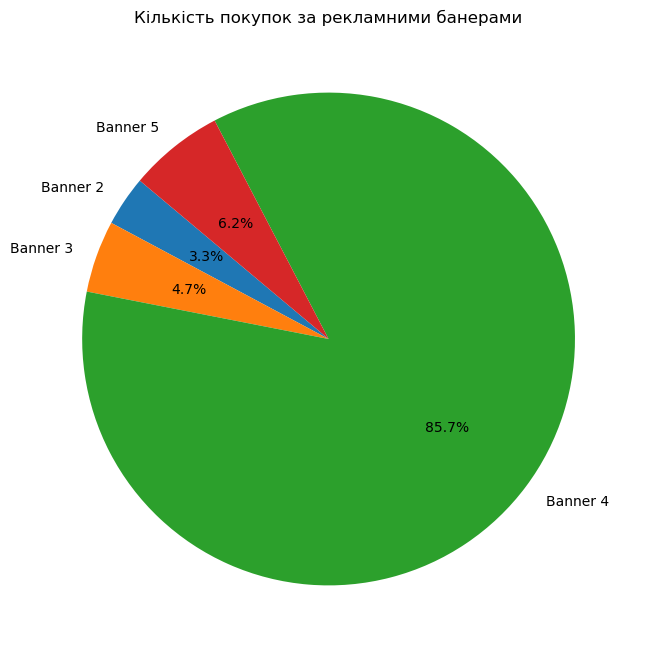

In [27]:
labels = task3_df1['Рекламний банер '].sort_values().unique()
plt.figure(figsize=(10, 8)) 
plt.pie(task3_df1.groupby('Рекламний банер ')['Кількість покупок'].sum(), labels=labels, autopct='%1.1f%%', startangle=140) 

plt.title('Кількість покупок за рекламними банерами')
plt.show()

In [15]:
banner_stats = task3_df1.groupby('Рекламний банер ')['Кількість покупок'].describe()
banner_stats

                    count      mean        std  min  25%  50%  75%    max
Рекламний банер                                                          
Banner 2            736.0  3.005435  11.817431  0.0  0.0  0.0  1.0  156.0
Banner 3            730.0  4.339726  29.028101  0.0  0.0  0.0  1.0  525.0
Banner 4          27887.0  2.060638  10.137328  0.0  0.0  0.0  1.0  752.0
Banner 5           4608.0  0.907118   3.871617  0.0  0.0  0.0  1.0  135.0


In [16]:
average_purchases_by_banner = task3_df1.groupby('Рекламний банер ')['Кількість покупок'].mean()
average_purchases_by_banner

Рекламний банер 
Banner 2    3.005435
Banner 3    4.339726
Banner 4    2.060638
Banner 5    0.907118
Name: Кількість покупок, dtype: float64


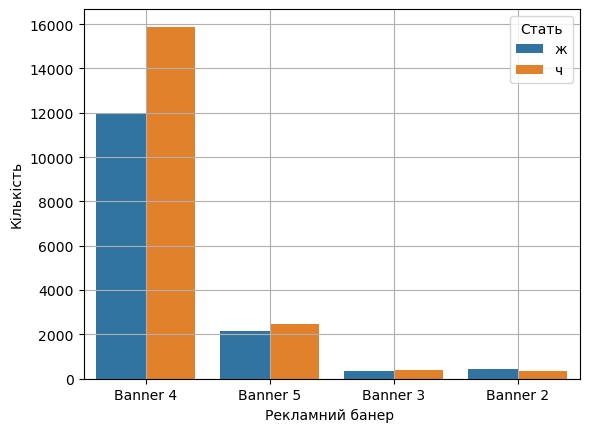

In [30]:
sns.countplot(x='Рекламний банер ', hue='Стать', data=task3_df1)
plt.ylabel('Кількість')
plt.grid() 
plt.show()

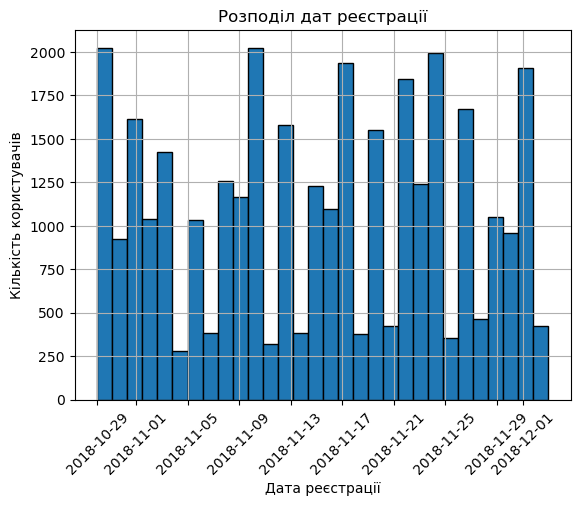

In [35]:
task3_df1['Дата реєстрації'] = pd.to_datetime(task3_df1['Дата реєстрації'])
task3_df1['Дата реєстрації'].hist(bins=30, edgecolor='black')
plt.xlabel('Дата реєстрації')
plt.ylabel('Кількість користувачів')
plt.title('Розподіл дат реєстрації')
plt.xticks(rotation=45)
plt.show()

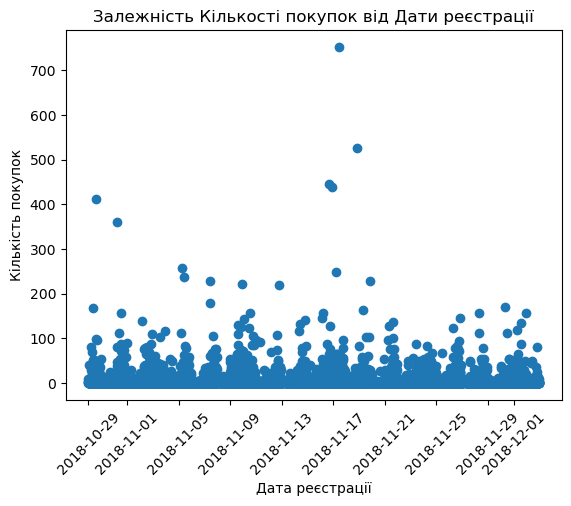

In [24]:
plt.scatter(task3_df1['Дата реєстрації'], task3_df1['Кількість покупок'])
plt.xlabel('Дата реєстрації')
plt.ylabel('Кількість покупок')
plt.title('Залежність Кількості покупок від Дати реєстрації')
plt.xticks(rotation=45)
plt.show()

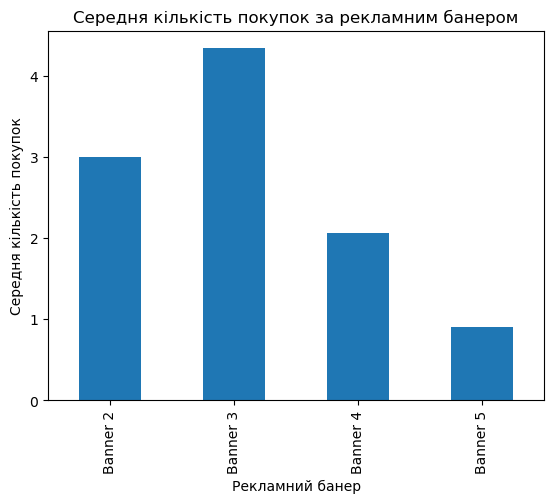

In [25]:
average_purchases_by_banner = task3_df1.groupby('Рекламний банер ')['Кількість покупок'].mean()
average_purchases_by_banner.plot(kind='bar')
plt.xlabel('Рекламний банер')
plt.ylabel('Середня кількість покупок')
plt.title('Середня кількість покупок за рекламним банером')
plt.show()